In [1]:
import pixiedust

Pixiedust database opened successfully


EXERCISE 1

The goal of simulated annealing is to maximize the performance of a model
relative to a fitness function defined over the model parameters you are seeking to
optimize. In Exercise 2, you will apply simulated annealing coded in scipy to
a one-dimensional problem in which you seek the value of X that maximizes the
output of a function called fitnessFunction. But first you must write code that
implements the function, which is the product of m and n:
m = 1+ cos(0.04v)2
n = exp(−v2 /(20000))

In [2]:
import math

def fitnessFunction(v):
    m = 1 + math.cos(0.04*v)**2
    n = math.exp(-v**2 /(20000))
    return m*n


EXERCISE 2

Display the fitness surface. To do this, make the wave fitness with 1000 points
starting at x= -500 and ending at x = 500 (using Data > Change Wave Scaling). 
Set the yvalues in fitness to the corresponding value of the fitnessFunction(). 
Display fitness and include the graph in your lab report.

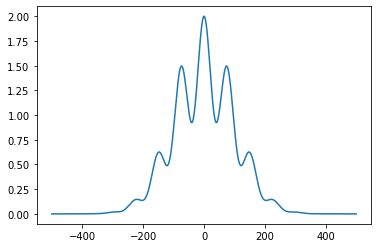

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def graph_fitness():
    v = np.arange(-500., 500., .5)
    fitness = []
    for x in v:
        fitness.append(fitnessFunction(x))
    plt.plot(v,fitness)

graph_fitness()

EXERCISE 3

Run the algorithm with an initial X value of 250 and an initial temperature of 10.
Plot the trajectory of the annealing algorithm along the fitness surface, Include the
graph in your lab report.
Slowly increase the temperature until you find the peak about 90% of the time.
Report this temperature and explain its significance in terms of the relationship
between the search radius and the dimensions of the width of the fitness curve.

Maximal value after annealing: 1.9999 found at x=0.2881 after 917 iteraions


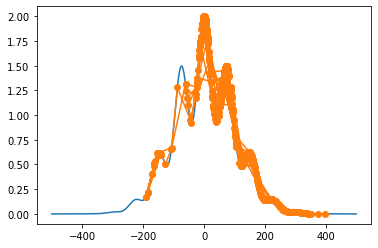

In [4]:


import random
import math
import matplotlib.pyplot as plt 

debug=False
interval = (-500, 500)
# import ipdb; ipdb.set_trace()

def f(x):
    # penalized version of fitnessFunction to avoid going out of interval
    ro = 1
    result = fitnessFunction(x)
    if x < min(interval):
        result -= ro * (min(interval)-x)**2
    elif x > max(interval):
        result -= ro * (x-max(interval))**2
    return result

def perturbation(fraction=1):
    # small move within interval length
    amplitude = (max(interval) - min(interval)) * fraction / 10
    delta = amplitude * random.uniform(-1, 1)
    return delta

def simulated_annealing(init_state, t0, tend=.01, alpha=0.9, max_nit=20):
    
    global states
    global costs
    global iterations
    
    iterations=[]
    costs = []
    states=[]
    nit=0
    
    current_state = init_state
    current_e = f(current_state)
    t = t0
    
    while (t > tend):
        nit += 1
        next_state = current_state + perturbation(0.5)
        next_e = f(next_state)
        delta_e = next_e - current_e
        delta_e = - delta_e
        if delta_e < 0:
            current_state = next_state
        else:
            if math.exp(-delta_e / t) > random.random():
                current_state = next_state
        current_e = f(current_state)
        t = t * alpha
        iterations.append(nit)
        costs.append(fitnessFunction(current_state))
        states.append(current_state)
    
    return current_state

global states
global costs

init_value = 250
init_temp = 10
final_temp = 0.001
alpha = 0.99

result = simulated_annealing(init_value, t0=init_temp, tend=final_temp, alpha=alpha)
print("Maximal value after annealing: %.4f found at x=%.4f after %d iteraions" % (fitnessFunction(result),result,iterations[-1]))


graph_fitness()
plt.plot(states,costs,"-o")



EXERCISE 4

Another informative graph is the plot of all the intermediate best fitnesses versus
iteration number. Make this plot. Include the graph in your lab report

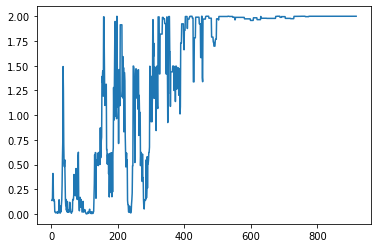

In [5]:
plt.plot(iterations,costs) 

EXERCISE 5

Complete the table below by running simulation 20 times with each of 10 different
values of temp shown. Plot number of failures vs temperature and number of
iterations to reach the peak vs temperature. Describe and explain any trends you
find.

In [6]:
newt = 2
temperatures = []
failures = []
for i in range(0,9):
    newt *= 2
    temperatures.append(newt)
    failures.append(0)

    for j in range(0,19):
        result = simulated_annealing(init_value, t0=newt, tend=final_temp, alpha=alpha)
        if abs(result>5):
            failures[i]+= 1
        #print("Maximal value after annealing: %.4f found at x=%.4f after %d iteraions" % (fitnessFunction(result),result,iterations[-1]))

plt.plot(temperatures,failures)        


Interresting: nb of failure vs final temerature
in this case simulated annealing seems sensitive to end temperature.
as DeltaE is very small if final temperature is too high exp(DeltaE/t) is always 0.99 and accept most of perturbations

In [ ]:
%%pixie_debugger

newt = 2
temperatures = []
failures = []
for i in range(0,9):
    newt /= 2
    temperatures.append(newt)
    failures.append(0)

    for j in range(0,99):
        result = simulated_annealing(init_value, t0=10, tend=newt, alpha=alpha)
        if abs(result>5):
            failures[i]+= 1
        #print("Maximal value after annealing: %.4f found at x=%.4f after %d iteraions" % (fitnessFunction(result),result,iterations[-1]))

plt.plot(temperatures,failures)    